In [1]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '../data/'

### Data splits:

In [3]:
splits = glob.glob(os.path.join(DATA_PATH, '*'))
print(splits)

['../data/uavid_test', '../data/uavid_train', '../data/uavid_val']


In [4]:
for split_path in splits:
    images = glob.glob(os.path.join(split_path, '**', 'Images', '*'))
    print(f'For split {os.path.basename(split_path)} found {len(images)} images')

For split uavid_test found 150 images
For split uavid_train found 600 images
For split uavid_val found 70 images


#### Train samples analysis:

In [5]:
train_split_dir = os.path.join(DATA_PATH, 'uavid_train', 'seq1')
train_images = glob.glob(os.path.join(train_split_dir, 'Images', '*'))

train_samples = []
for image_path in train_images:
    label_path = image_path.replace('Images', 'Labels')
    if not os.path.exists(label_path):
        print(f'Label not found for {image_path}')
        continue
    
    train_samples.append((image_path, label_path))

Visualizing ../data/uavid_train/seq1/Images/flipped16.png
Visualizing ../data/uavid_train/seq1/Images/shifted70.png
Visualizing ../data/uavid_train/seq1/Images/shifted141.png
Visualizing ../data/uavid_train/seq1/Images/flipped7.png


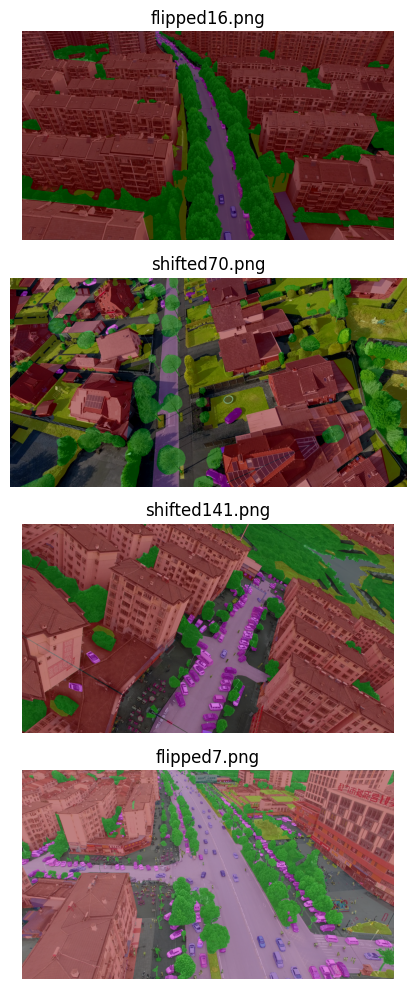

In [6]:
VISUZALIZE_N_SAMPLES = 4

fig, axs = plt.subplots(VISUZALIZE_N_SAMPLES, 1, figsize=(10*VISUZALIZE_N_SAMPLES, 10))
axs = axs.flatten()

for i, sample_idx in enumerate(np.random.choice(list(range(len(train_samples))), VISUZALIZE_N_SAMPLES)):
    image_path, label_path = train_samples[sample_idx]
    print(f'Visualizing {image_path}')
    image = cv2.imread(image_path)
    label = cv2.imread(label_path)
    
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i].imshow(cv2.cvtColor(label, cv2.COLOR_BGR2RGB), alpha=0.5)
    axs[i].set_title(os.path.basename(image_path))
    axs[i].axis('off')
plt.tight_layout()
plt.show()

In [7]:
train_original_images = glob.glob(os.path.join(train_split_dir, 'Images', '000*00.png')) + \
    glob.glob(os.path.join(train_split_dir, 'Images', 'file*-*.png'))
train_flipped_images = glob.glob(os.path.join(train_split_dir, 'Images', 'flipped*.png'))
train_shifted_images = glob.glob(os.path.join(train_split_dir, 'Images', 'shifted*.png'))

print('In train split there are:')
print(f'{len(train_original_images)} samples with pattern 000*00.png or file*-*.png')
print(f'{len(train_flipped_images)} samples with pattern flipped*.png')
print(f'{len(train_shifted_images)} samples with pattern shifted*.png')

In train split there are:
200 samples with pattern 000*00.png or file*-*.png
200 samples with pattern flipped*.png
200 samples with pattern shifted*.png


Visualizing ../data/uavid_train/seq1/Images/000000.png
Visualizing ../data/uavid_train/seq1/Images/flipped0.png
Visualizing ../data/uavid_train/seq1/Images/shifted0.png


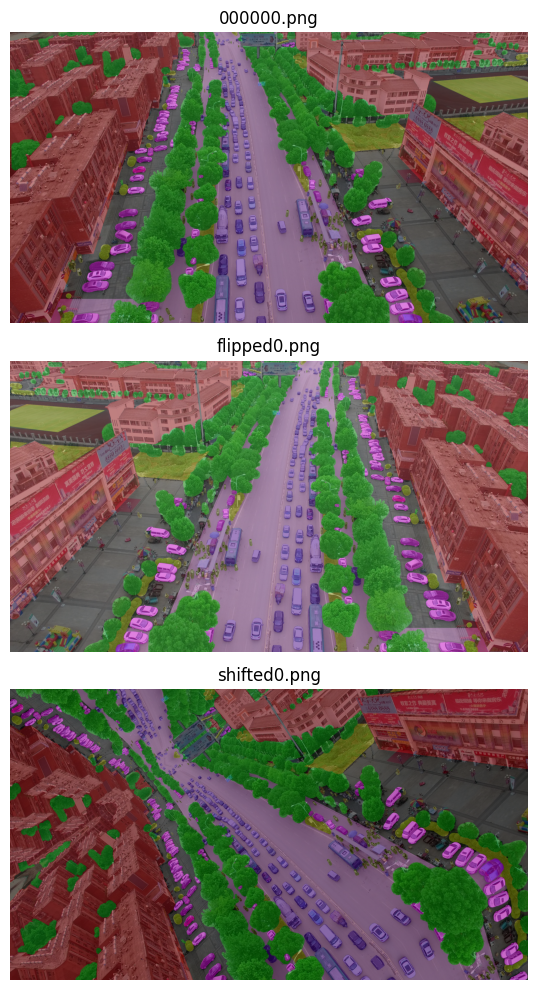

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(10*VISUZALIZE_N_SAMPLES, 10))
axs = axs.flatten()

original_sample = (train_original_images[0], train_original_images[0].replace('/Images/', '/Labels/'))
flipped_sample = (train_flipped_images[0], train_flipped_images[0].replace('/Images/', '/Labels/'))
shifted_sample = (train_shifted_images[0], train_shifted_images[0].replace('/Images/', '/Labels/'))

for i, (image_path, label_path) in enumerate([original_sample, flipped_sample, shifted_sample]):
    print(f'Visualizing {image_path}')
    image = cv2.imread(image_path)
    label = cv2.imread(label_path)
    
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i].imshow(cv2.cvtColor(label, cv2.COLOR_BGR2RGB), alpha=0.5)
    axs[i].set_title(os.path.basename(image_path))
    axs[i].axis('off')
plt.tight_layout()
plt.show()

In [9]:
def get_png_size(filepath: str) -> tuple:
    """ Get the size of a PNG image parsing the header """
    with open(filepath, 'rb') as f:
        f.seek(16)
        width = int.from_bytes(f.read(4), 'big')
        height = int.from_bytes(f.read(4), 'big')
        return height, width

resolution_dict = {}
for image_path in train_original_images + train_flipped_images + train_shifted_images:
    resolution = get_png_size(image_path)
    if resolution not in resolution_dict:
        resolution_dict[resolution] = []
    resolution_dict[resolution].append(image_path)

In [10]:
for resolution, images in resolution_dict.items():
    print(f'Found {len(images)} images with resolution {resolution}')
    if len(images) > 10:
        print(f'First 10: {images[:10]}')
    else:
        print(f'All: {images}')
    print(f'Total: {len(images)}\n')

Found 390 images with resolution (2160, 3840)
First 10: ['../data/uavid_train/seq1/Images/000000.png', '../data/uavid_train/seq1/Images/000100.png', '../data/uavid_train/seq1/Images/000200.png', '../data/uavid_train/seq1/Images/000300.png', '../data/uavid_train/seq1/Images/000400.png', '../data/uavid_train/seq1/Images/000500.png', '../data/uavid_train/seq1/Images/000600.png', '../data/uavid_train/seq1/Images/000700.png', '../data/uavid_train/seq1/Images/000800.png', '../data/uavid_train/seq1/Images/000900.png']
Total: 390

Found 210 images with resolution (2160, 4096)
First 10: ['../data/uavid_train/seq1/Images/file10-1.png', '../data/uavid_train/seq1/Images/file10-10.png', '../data/uavid_train/seq1/Images/file10-2.png', '../data/uavid_train/seq1/Images/file10-3.png', '../data/uavid_train/seq1/Images/file10-4.png', '../data/uavid_train/seq1/Images/file10-5.png', '../data/uavid_train/seq1/Images/file10-6.png', '../data/uavid_train/seq1/Images/file10-7.png', '../data/uavid_train/seq1/Ima

In [11]:
label_path = train_original_images[0].replace('/Images/', '/Labels/')
label = cv2.imread(label_path)
print(f'Label shape: {label.shape}')

label = label.reshape(-1, 3)
pixel_colors = np.unique(label, axis=0)
print(f'Found {len(pixel_colors)} unique colors in the label image')
print(pixel_colors)

Label shape: (2160, 3840, 3)
Found 8 unique colors in the label image
[[  0   0   0]
 [  0   0 128]
 [  0  64  64]
 [  0 128   0]
 [  0 128 128]
 [128   0  64]
 [128  64 128]
 [192   0 192]]


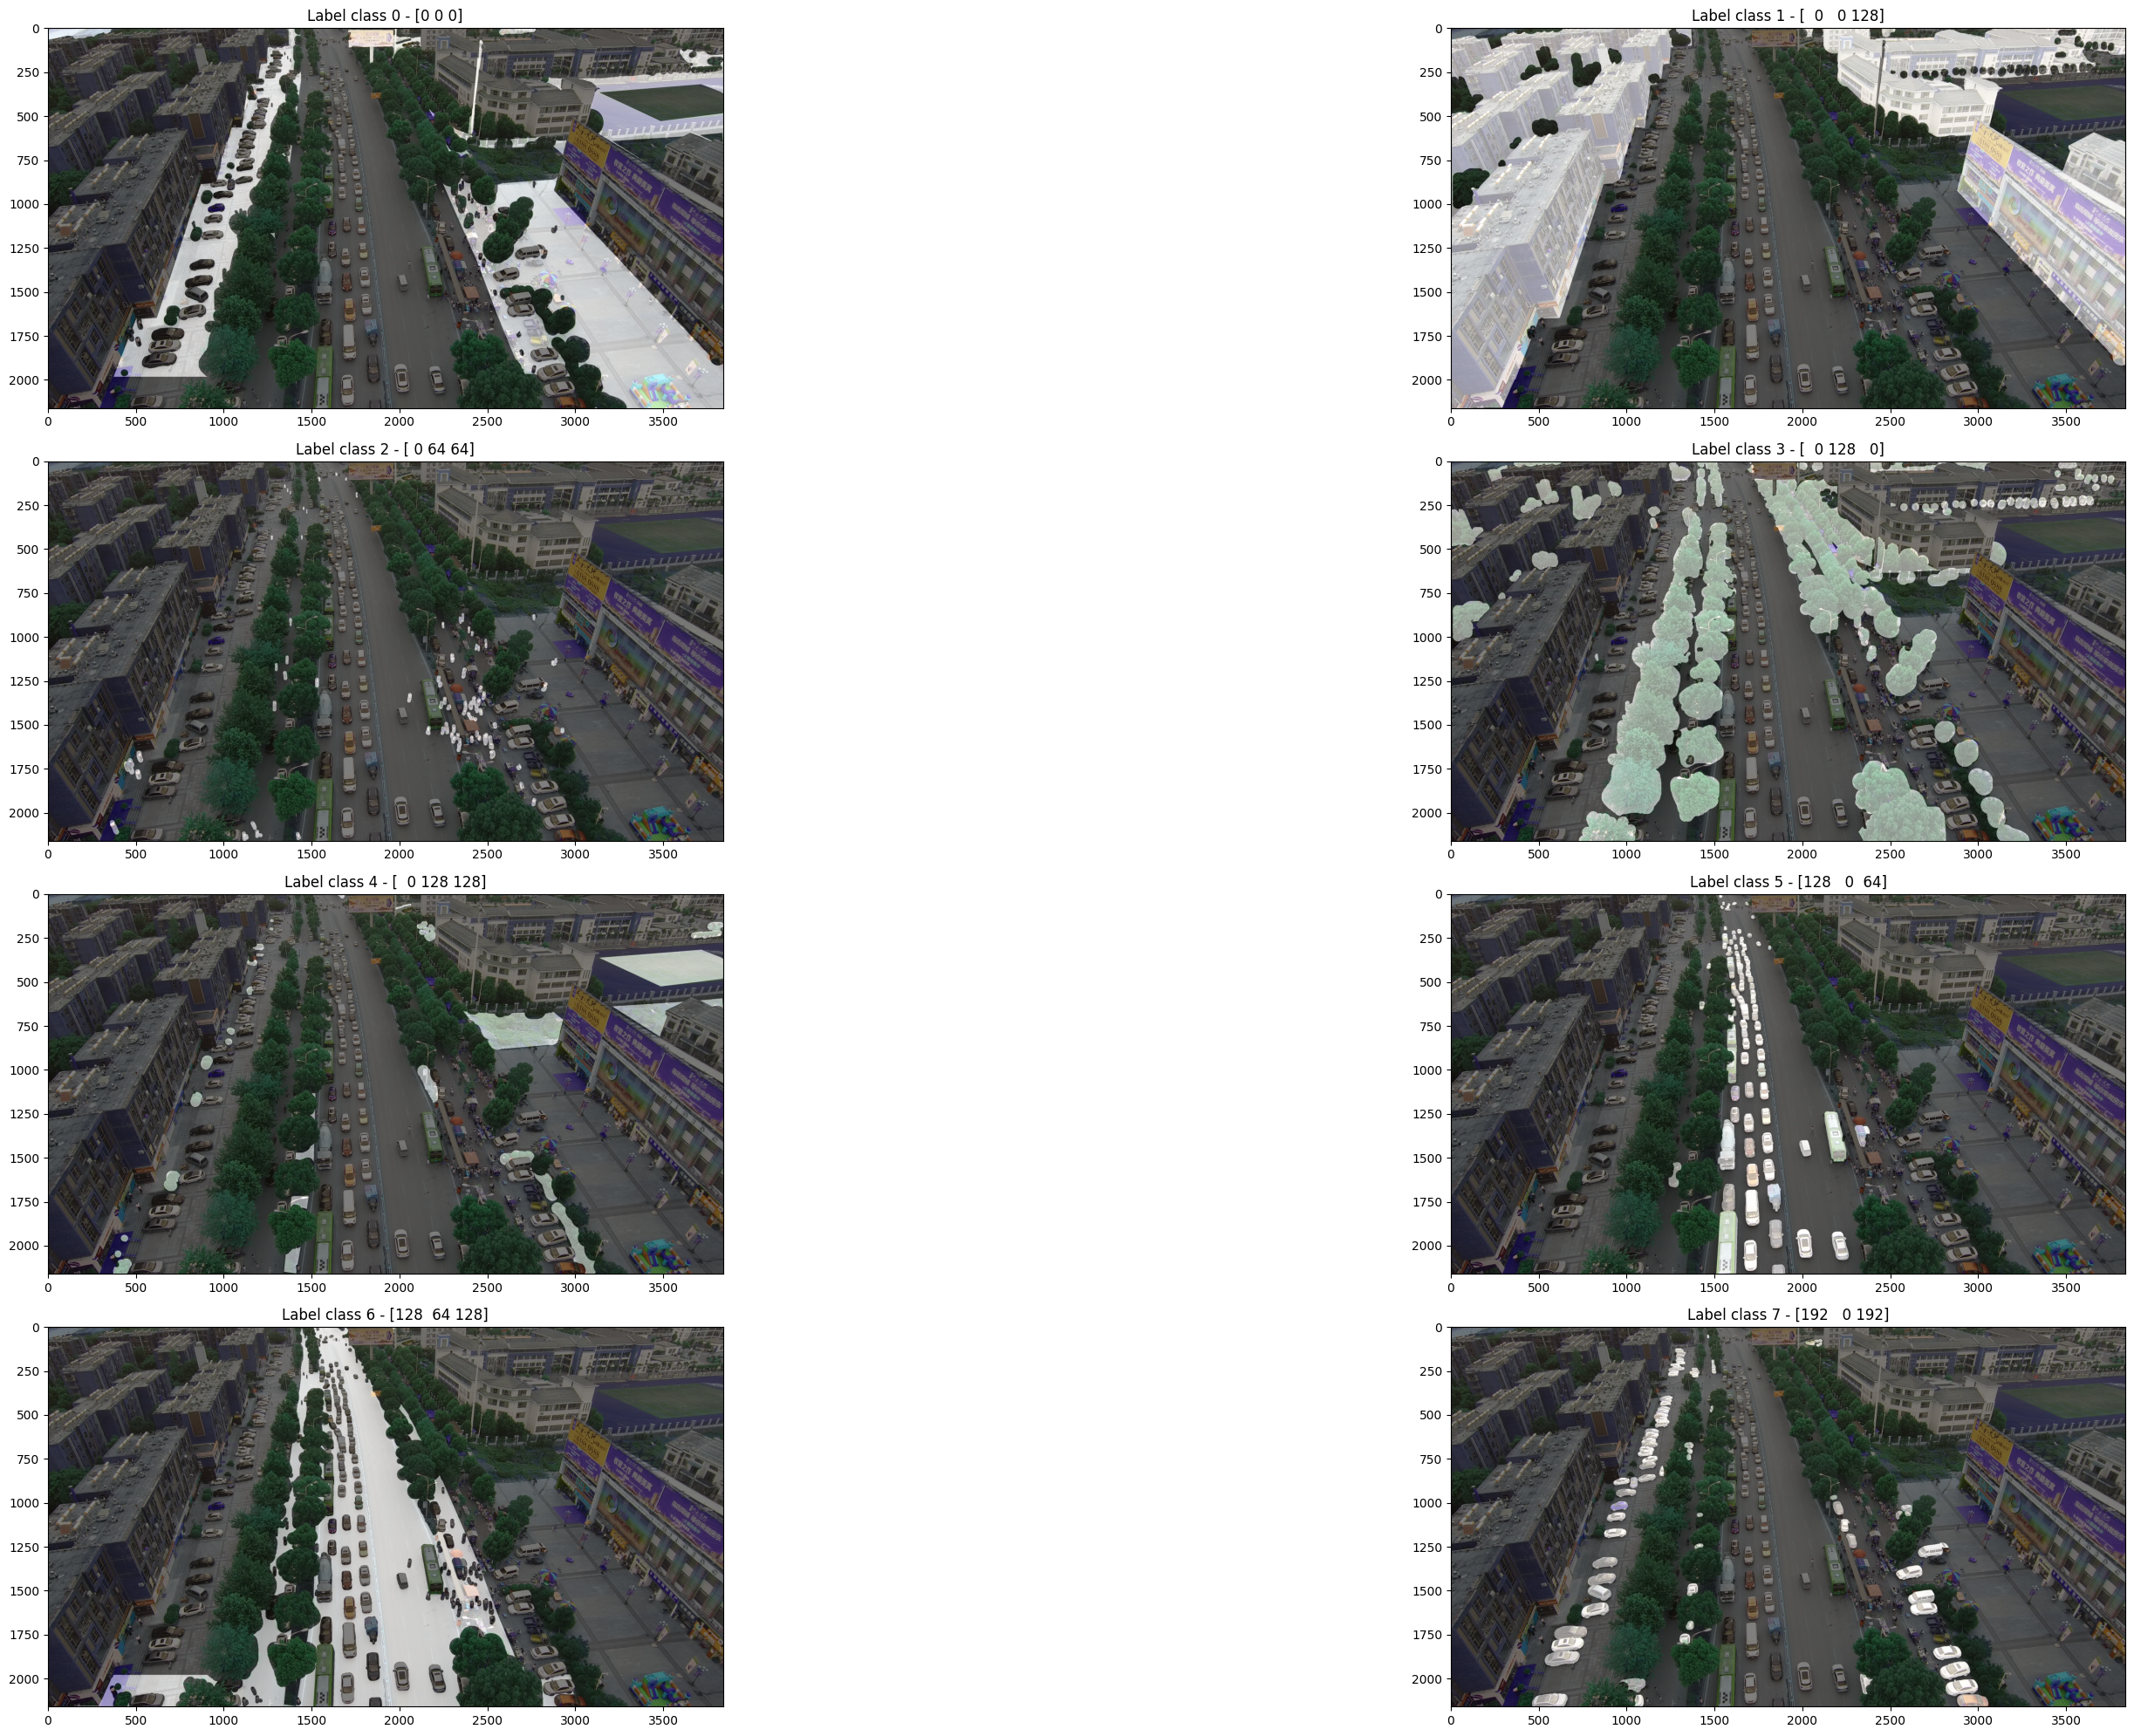

In [25]:
fig, axs = plt.subplots(4, 2, figsize=(40, 20))
axs = axs.flatten()

image = cv2.imread(train_original_images[0])

for i, color in enumerate(pixel_colors):
    label_class = np.all(label == color, axis=1, keepdims=True)
    label_class = label_class.reshape(image.shape[0], image.shape[1], 1)
    label_class = np.repeat(label_class, 3, axis=2).astype(np.uint8) * 255
    axs[i].imshow(image)
    axs[i].imshow(label_class, alpha=0.5)
    axs[i].set_title(f'Label class {i} - {color}')
plt.tight_layout()
plt.show()

### Val samples analysis

### Conclusion

1. There are 3 splits: train (600 samples), val (70 samples), test (150 samples)
2. Train split contains 200 original samples and 400 augmented samples (50% hflipped, 50% shifted).
3. Image resolution is 4K.
4. There are 8 classes annotated by unique RGB color each.
5. Human class can be insufficiently represented due to small size of objects. Futhermore, if the image will be squeezed during inference, this can have criticall affect on human class segmentation accuracy. May be "Slicing" strategy with lightweight model will be more preferable.